In [13]:
from smartem.segmentation import segmenter, utils
from skimage import measure
import skimage
from smartem.offline.train_mb_error_detector.NNtools import UNet

import h5py
import matplotlib.pyplot as plt
import torch
import numpy as np
import pyvoi
import pandas as pd
import seaborn as sns
import segmentation_models_pytorch as smp
from tqdm import tqdm

In [2]:
torch.cuda.is_available()

True

In [5]:
hdf5_path = "/storage2/projects/smartEM/em-vis/smartem-data-test.hdf5"
temp_dir = "/storage2/projects/smartEM/em-vis/temp/"

device = torch.device("cuda:1")

em2mb_model = UNet.UNet(1, 2)
em2mb_path = "/storage2/projects/smartEM/EM2MB_networks/em2mb_best.pth"

In [11]:
Iseg_label = segmenter.Segmenter(em2mb_path, segmenter_function = measure.label, device=device)
Iseg_label.set_model(model_class=em2mb_model)

In [9]:
Iseg_watershed = segmenter.Segmenter(em2mb_path, segmenter_function = skimage.segmentation.watershed, device=device)
Iseg_watershed.set_model(model_class=em2mb_model)

Iseg_custom_watershed = segmenter.Segmenter(em2mb_path, segmenter_function = utils.watershed, device=device)
Iseg_custom_watershed.set_model(model_class=em2mb_model)

In [26]:
data_dwts = []
data_hdt_vois_label_label = []
data_hdt_vois_watershed_watershed = []
data_hdt_vois_label_watershed = []
data_hdt_vois_watershed_label = []
data_hdt_vois_custom_watershed = []
# data_gt_vois = []

with h5py.File(hdf5_path, "r") as f:
    for reg in tqdm(f.keys()):
        group = f[reg]

        dwts = [int(dwt) for dwt in list(group.keys())]
        dwts.sort()
        slowest_dwt = dwts[-1]

        mask = group[f"{slowest_dwt}/mask"][()]
        gt_labels_label = measure.label(255 - mask)
        gt_labels_watershed = skimage.segmentation.watershed(mask)

        if gt_labels_label.shape[0] % 32 != 0:
            gt_labels_label = gt_labels_label[:-(gt_labels_label.shape[0] % 32), :]
        
        if gt_labels_watershed.shape[0] % 32 != 0:
            gt_labels_watershed = gt_labels_watershed[:-(gt_labels_watershed.shape[0] % 32), :]

        print("Computing segs for 1200ns")
        # 1200ns
        im = group[f"{slowest_dwt}/im"][()]
        hdt_labels_label = Iseg_label.get_labels(im)
        hdt_labels_watershed = Iseg_watershed.get_labels(im)
        # hdt_labels_custom_watershed = Iseg_custom_watershed.get_labels(im)

        gt_vi_label_label,_,_ = pyvoi.VI(gt_labels_label.flatten(), hdt_labels_label.flatten())
        gt_vi_watershed_watershed,_,_ = pyvoi.VI(gt_labels_watershed.flatten(), hdt_labels_watershed.flatten())
        gt_vi_label_watershed,_,_ = pyvoi.VI(gt_labels_label.flatten(), hdt_labels_watershed.flatten())
        gt_vi_watershed_label,_,_ = pyvoi.VI(gt_labels_watershed.flatten(), hdt_labels_label.flatten())

        data_hdt_vois_label_label.append(gt_vi_label_label.item())
        data_hdt_vois_watershed_watershed.append(gt_vi_watershed_watershed.item())
        data_hdt_vois_label_watershed.append(gt_vi_label_watershed.item())
        data_hdt_vois_watershed_label.append(gt_vi_watershed_label.item())

        # gt_vi_custom_watershed,_,_ = pyvoi.VI(gt_labels.flatten(), hdt_labels_custom_watershed.flatten())





        # all dwts
        # for dwt in tqdm(group.keys(), desc=reg):
        #     im = group[f"{dwt}/im"][()]

        #     qdt_labels_label = Iseg_label.get_labels(im)
        #     qdt_labels_watershed = Iseg_watershed.get_labels(im)
        #     qdt_labels_custom_watershed = Iseg_custom_watershed.get_labels(im)

        #     voi_hdt_label,_,_ = pyvoi.VI(hdt_labels_label.flatten(), qdt_labels_label.flatten())
        #     voi_hdt_watershed,_,_ = pyvoi.VI(hdt_labels_watershed.flatten(), qdt_labels_watershed.flatten())
        #     voi_hdt_custom_watershed,_,_ = pyvoi.VI(hdt_labels_custom_watershed.flatten(), qdt_labels_custom_watershed.flatten())
        #     data_hdt_vois_label.append(voi_hdt_label.item())
        #     data_hdt_vois_watershed.append(voi_hdt_watershed.item())
        #     data_hdt_vois_custom_watershed.append(voi_hdt_custom_watershed.item())
        #     data_dwts.append(int(dwt))



# data = {"Dwell Time (ns)": data_dwts, "Variation of Information from GT (nats)": data_gt_vois, "Variation of Information from 1200ns (nats)": data_hdt_vois}
# df = pd.DataFrame(data=data)

  0%|          | 0/18 [00:00<?, ?it/s]

Computing segs for 1200ns


  6%|▌         | 1/18 [00:02<00:46,  2.76s/it]

Computing segs for 1200ns


 11%|█         | 2/18 [00:05<00:41,  2.59s/it]

Computing segs for 1200ns


 17%|█▋        | 3/18 [00:07<00:39,  2.61s/it]

Computing segs for 1200ns


 22%|██▏       | 4/18 [00:10<00:35,  2.56s/it]

Computing segs for 1200ns


 28%|██▊       | 5/18 [00:12<00:33,  2.57s/it]

Computing segs for 1200ns


 33%|███▎      | 6/18 [00:15<00:31,  2.61s/it]

Computing segs for 1200ns


 39%|███▉      | 7/18 [00:18<00:28,  2.61s/it]

Computing segs for 1200ns


 44%|████▍     | 8/18 [00:20<00:26,  2.62s/it]

Computing segs for 1200ns


 50%|█████     | 9/18 [00:23<00:24,  2.67s/it]

Computing segs for 1200ns


 56%|█████▌    | 10/18 [00:26<00:21,  2.67s/it]

Computing segs for 1200ns


 61%|██████    | 11/18 [00:28<00:18,  2.63s/it]

Computing segs for 1200ns


 67%|██████▋   | 12/18 [00:31<00:15,  2.53s/it]

Computing segs for 1200ns


 72%|███████▏  | 13/18 [00:33<00:12,  2.55s/it]

Computing segs for 1200ns


 78%|███████▊  | 14/18 [00:36<00:10,  2.55s/it]

Computing segs for 1200ns


 83%|████████▎ | 15/18 [00:38<00:07,  2.56s/it]

Computing segs for 1200ns


 89%|████████▉ | 16/18 [00:41<00:05,  2.55s/it]

Computing segs for 1200ns


 94%|█████████▍| 17/18 [00:43<00:02,  2.53s/it]

Computing segs for 1200ns


100%|██████████| 18/18 [00:46<00:00,  2.58s/it]


In [29]:
print(len(data_hdt_vois_label_label), len(data_hdt_vois_watershed_watershed), len(data_hdt_vois_label_watershed), len(data_hdt_vois_watershed_label))


18 18 18 18


In [31]:
Methods = ["GT:Label\n-HDT:Label" for _ in range(len(data_hdt_vois_label_label))] + \
          ["GT:Watershed\n-HDT:Watershed" for _ in range(len(data_hdt_vois_watershed_watershed))] + \
          ["GT:Label-\nHDT:Watershed" for _ in range(len(data_hdt_vois_label_watershed))] + \
          ["GT:Watershed-\nHDT:Label" for _ in range(len(data_hdt_vois_watershed_label))]

print(len(Methods))

72


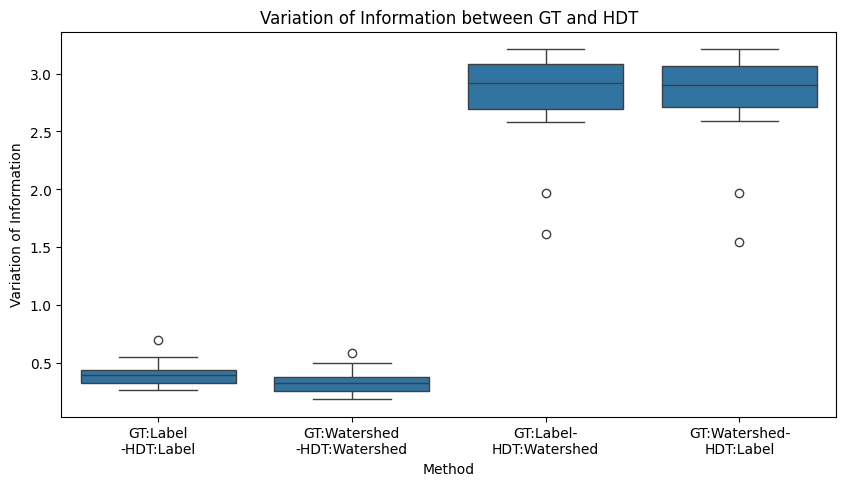

In [35]:
data = {
    "Method": Methods,
    "Variation of Information": data_hdt_vois_label_label + data_hdt_vois_watershed_watershed + data_hdt_vois_label_watershed + data_hdt_vois_watershed_label
    
}
df = pd.DataFrame(data=data)

plt.figure(figsize=(10, 5))
sns.boxplot(x="Method", y="Variation of Information", data=df)
# plt.xticks(rotation=45)
plt.title("Variation of Information between GT and HDT")
plt.show()
# plt.savefig("/storage2/projects/smartEM/EM2MB_networks/vi_boxplot.png")

In [27]:
print(np.mean(data_hdt_vois_label_label))
print(np.mean(data_hdt_vois_watershed_watershed))
print(np.mean(data_hdt_vois_label_watershed))
print(np.mean(data_hdt_vois_watershed_label))

0.4107675552368164
0.33695237504111397
2.809331046210395
2.8019118110338845
